In [32]:
# Prepare useful library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
%matplotlib inline

from sklearn.linear_model import LinearRegression
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson

import warnings
warnings.filterwarnings('ignore')

In [16]:
# Read dataset
X = pd.DataFrame(datasets.load_boston().data, columns=datasets.load_boston().feature_names)
y = datasets.load_boston().target

In [17]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [18]:
# Fitting to model
clf = LinearRegression()
clf.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
# Show R2-Squared
print("R2-Squared is {}".format(np.round(clf.score(X,y), 2)))

R2-Squared is 0.74


In [21]:
# Calculate residual
predicted = clf.predict(X)
result = pd.DataFrame({'Actual': y, 'Predicted': predicted})
result['Residuals'] = abs(result['Actual']) - abs(result['Predicted'])
result

,Actual,Predicted,Residuals
0,24.0,30.003843,-6.003843
1,21.6,25.025562,-3.425562
2,34.7,30.567597,4.132403
3,33.4,28.607036,4.792964
4,36.2,27.943524,8.256476
...,...,...,...
501,22.4,23.533341,-1.133341
502,20.6,22.375719,-1.775719
503,23.9,27.627426,-3.727426
504,22.0,26.127967,-4.127967


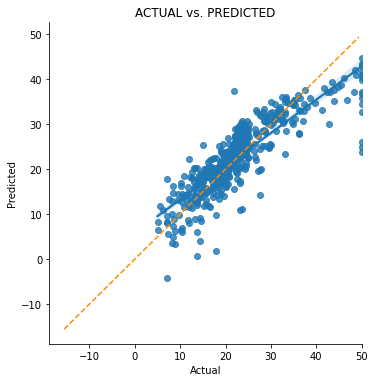

In [22]:
# Asumptions 1 - Linearity
sns.lmplot(x='Actual', y='Predicted', data=result)
line_coords = np.arange(result.min().min(), result.max().max())
plt.plot(line_coords, line_coords,
         color='darkorange', linestyle='--')
plt.title('ACTUAL vs. PREDICTED');

In [27]:
# Asumptions 2 - Normality
print('Score p-value : {}\nBelow 0.05 means normal'.format(np.round(normal_ad(result['Residuals'])[1],4)))

Score p-value : 0.0
Below 0.05 means normal


In [29]:
p_value_thresh = 0.05
if normal_ad(result['Residuals'])[1] < p_value_thresh:
  print('Residuals are not normally distributed')
else:
  print('Residuals are normally distributed')

Residuals are not normally distributed


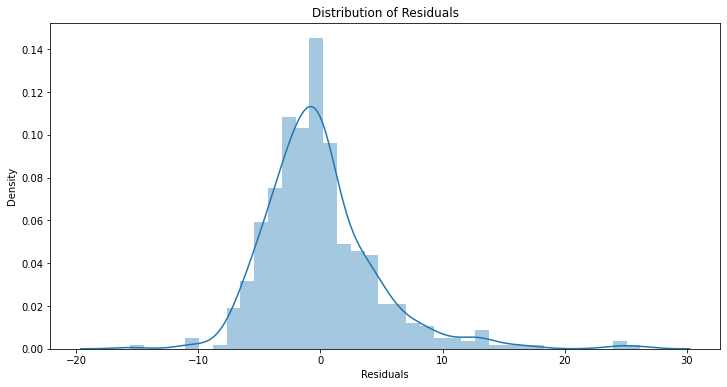

In [33]:
plt.subplots(figsize=(12,6))
plt.title('Distribution of Residuals')
sns.distplot(result['Residuals']);

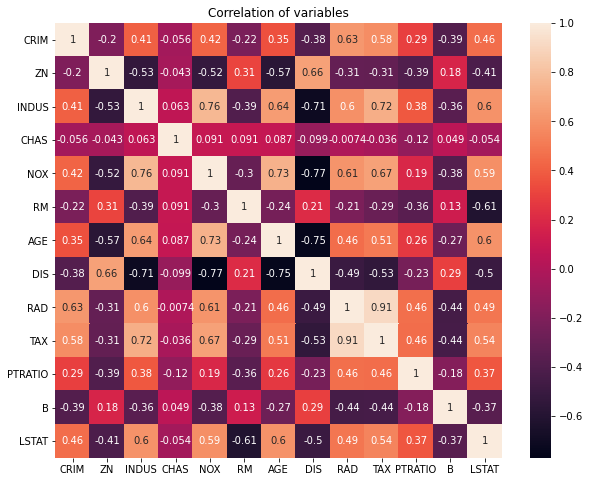

In [37]:
# Asumptions 3 - Multicollinearity
plt.figure(figsize=(10,8))
sns.heatmap(pd.DataFrame(X, columns = X.columns).corr(), annot=True)
plt.title('Correlation of variables');

In [53]:
VIF = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
for idx, vif in enumerate(VIF):
  print('{0}: {1}'.format(X.columns[idx], vif))
pos_multi = sum([1 for vif in VIF if vif > 10])
def_multi = sum([1 for vif in VIF if vif > 100])
print('{0} cases of possible multicollinearity'.format(pos_multi))
print('{0} cases of definite multicollinearity'.format(def_multi))
print()
if def_multi == 0:
  if pos_multi == 0:
    print('Assumption satisfied')
  else:
    print('Assumption possibly satisfied')
    print()
    print('Coefficient interpretability may be problematic')
    print('Consider removing variables with a high Variance Inflation Factor (VIF)')
else:
  print('Assumption not satisfied')
  print()
  print('Coefficient interpretability will be problematic')
  print('Consider removing variables with a high Variance Inflation Factor (VIF)')

CRIM: 2.100372819961522
ZN: 2.8440132669462637
INDUS: 14.485757706539331
CHAS: 1.1529518589418775
NOX: 73.89494652814788
RM: 77.94828304638538
AGE: 21.38685048994309
DIS: 14.6996523837492
RAD: 15.167724857920897
TAX: 61.227274009649456
PTRATIO: 85.02954731061801
B: 20.104942636229136
LSTAT: 11.102024772203539
10 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption possibly satisfied

Coefficient interpretability may be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)


In [55]:
# Asumptions 4 - Autocorrelation
durbin = durbin_watson(result['Residuals'])
print('Score durbin-watson', durbin)
if durbin < 1.5:
  print('Signs of positive autocorrelation', '\n')
  print('Assumption not satisfied')
elif durbin > 2.5:
  print('Signs of negative autocorrelation', '\n')
  print('Assumption not satisfied')
else:
  print('Little to no autocorrelation', '\n')
  print('Assumption satisfied')

Score durbin-watson 1.0715916506006853
Signs of positive autocorrelation 

Assumption not satisfied


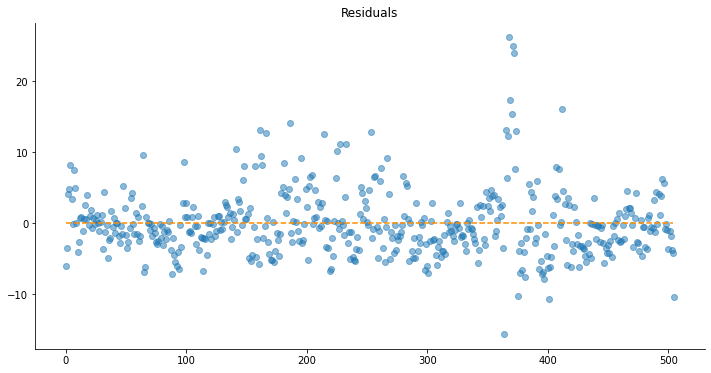

In [56]:
# Asumption 5 - Homoscedasticity
plt.subplots(figsize=(12,6))
ax = plt.subplot(111) # to remove spines
plt.scatter(x=result.index, y=result.Residuals, alpha=0.5)
plt.plot(np.repeat(0, result.index.max()), color='darkorange', linestyle='--')
ax.spines['right'].set_visible(False) # Removing the right spine
ax.spines['top'].set_visible(False) # Removing the top spine
plt.title('Residuals');

In [ ]:
# CONCLUSION
# Dataset doesn't fit classic assumption test!